<a href="https://colab.research.google.com/github/bjoyita/ImageFilters/blob/main/TDSblog_FFT_Particles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import difference_of_gaussians, window
from scipy.fft import fftn, fftshift

# Microstructure 1

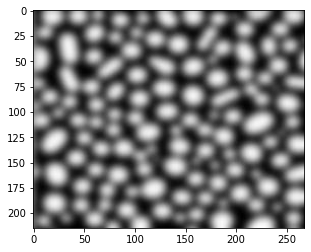

In [ ]:
A = io.imread('s1.jpg')
plt.imshow(A, cmap='gray')

In [ ]:
A.shape

(215, 268)

In [ ]:
#create an open grid for our image
x,y = np.ogrid[0:268, 0:215]

# FOURIER TRANSFORM TO DETECT EDGES

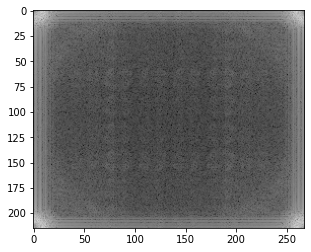

In [ ]:
A_F = np.fft.fft2(A)
plt.imshow(np.log(abs(A_F)), cmap ='gray')

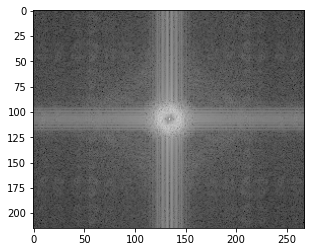

In [ ]:
A_F_02 = np.fft.fftshift(A_F)
plt.imshow(np.log(abs(A_F_02)), cmap ='gray')


In [ ]:
nx, ny = A_F_02.shape

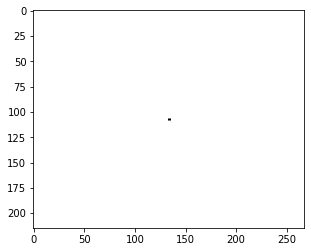

In [ ]:
mask_h = np.ones((nx,ny), np.uint8) # mask should have the same dimension as that of the image
center_x = nx/2
center_y = ny/2

# OPEN GRID
x, y = np.ogrid[:nx, :ny]
circle_mask = (x-center_x)**2 + (y-center_y)**2 <= 1*2
mask_h[circle_mask] = 0

plt.imshow(mask_h, cmap ='gray')

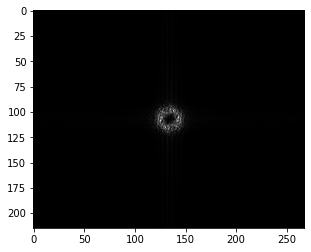

In [ ]:
A_F_02_c= A_F_02.copy()

#black out the center by applying high frequency mask
A_F_02_h = A_F_02_c* mask_h 

#show the image
plt.imshow(abs(A_F_02_h), cmap ='gray')

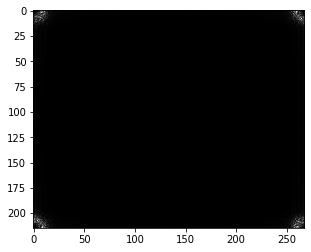

In [ ]:
A_F_02_originBack = np.fft.ifftshift(A_F_02_h)
plt.imshow(abs(A_F_02_originBack), cmap ='gray')

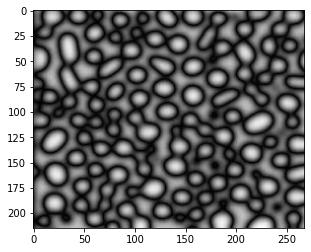

In [ ]:
originalImage = np.fft.ifft2(A_F_02_originBack)
plt.imshow(abs(originalImage), cmap ='gray')

**When edge detection is the aim, use small radius mask to identify proper edges**

In [ ]:
from skimage import filters
Sharpimg = filters.unsharp_mask(A, radius = 50.0, amount = 1.0)

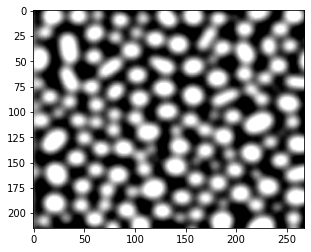

In [ ]:
plt.imshow(Sharpimg, cmap ='gray')

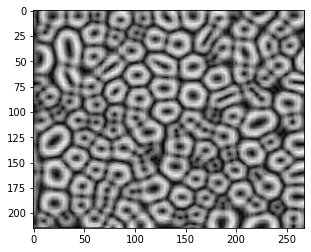

In [ ]:
from skimage.filters import sobel,sobel_v, sobel_h, roberts
A_sobel = sobel(A)


#fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,10))
plt.imshow(A_sobel, cmap='gray')


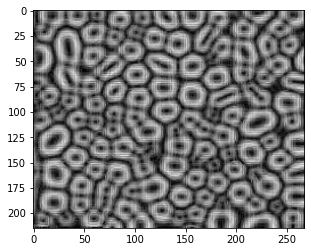

In [ ]:
A_roberts = roberts(A)
plt.imshow(A_roberts, cmap='gray')

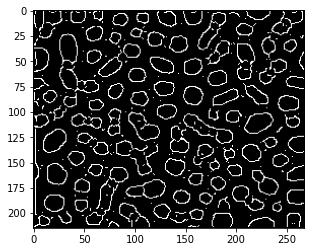

In [ ]:
from skimage.feature import canny
A_canny= canny(A)
plt.imshow(A_canny, cmap ='gray')


**Comparison of different image filters for edge detection**

Text(0.5, 1.0, 'Canny filter')

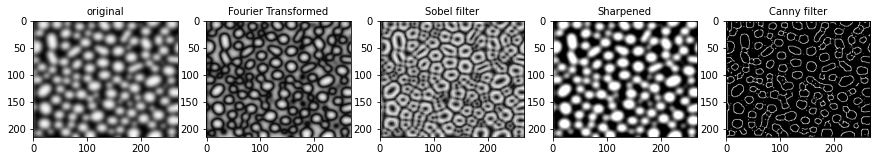

In [ ]:
fig, ax = plt.subplots(1, 5, figsize =(15,15))

ax[0].imshow(A, cmap ='gray')
ax[0].set_title("original", fontsize = 10)
ax[1].imshow(abs(originalImage), cmap ='gray')
ax[1].set_title("Fourier Transformed", fontsize = 10)
ax[2].imshow(A_sobel, cmap ='gray')
ax[2].set_title("Sobel filter", fontsize = 10)
ax[3].imshow(Sharpimg, cmap ='gray')
ax[3].set_title("Sharpened", fontsize = 10)
ax[4].imshow(A_canny, cmap ='gray')
ax[4].set_title("Canny filter", fontsize = 10)
